In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)''')

# Insert sample data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.5),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [20]:
# Query to summarize sales
query = '''
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load results into DataFrame
df = pd.read_sql_query(query, conn)

In [21]:
# Display the result
print("Sales Summary:\n")
print(df)

Sales Summary:

  product  total_qty  revenue
0   Apple         45    112.5
1  Banana         90     90.0
2  Orange         45     67.5


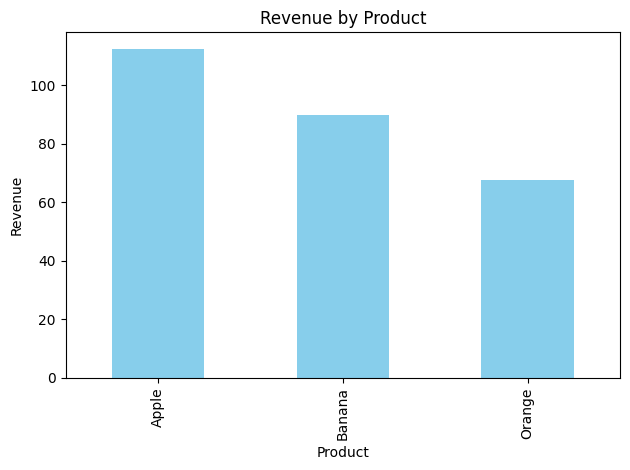

In [22]:
# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()